In [1]:
import tensorflow as tf

print("PhysicalDevice:", tf.config.list_physical_devices('GPU'))

PhysicalDevice: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.16.2
Num GPUs Available: 1


In [14]:
import psutil

mem = psutil.virtual_memory()

print(f"🧠 Total RAM: {mem.total / 1e9:.2f} GB")
print(f"🟢 Available RAM: {mem.available / 1e9:.2f} GB")
print(f"📉 Used RAM: {mem.used / 1e9:.2f} GB")
print(f"💡 RAM Usage: {mem.percent}%")


🧠 Total RAM: 8.59 GB
🟢 Available RAM: 2.03 GB
📉 Used RAM: 3.29 GB
💡 RAM Usage: 76.4%



Processing year: 2018
Top 10 flows by value:
      source_country                                      source_sector  \
9217           Chile  {'"Retail trade, except of motor vehicles and ...   
9479           Chile  {'"Retail trade, except of motor vehicles and ...   
9441           Chile  {'"Retail trade, except of motor vehicles and ...   
9440           Chile  {'"Retail trade, except of motor vehicles and ...   
9439           Chile  {'"Retail trade, except of motor vehicles and ...   
9447           Chile  {'"Retail trade, except of motor vehicles and ...   
9113           Chile  {'"Retail trade, except of motor vehicles and ...   
20038          Chile  {'"Retail trade, except of motor vehicles and ...   
11815          Chile  {'"Retail trade, except of motor vehicles and ...   
9206           Chile  {'"Retail trade, except of motor vehicles and ...   

      target_country                                      target_sector  \
9217          Brazil  {'Re-processing of secondary le

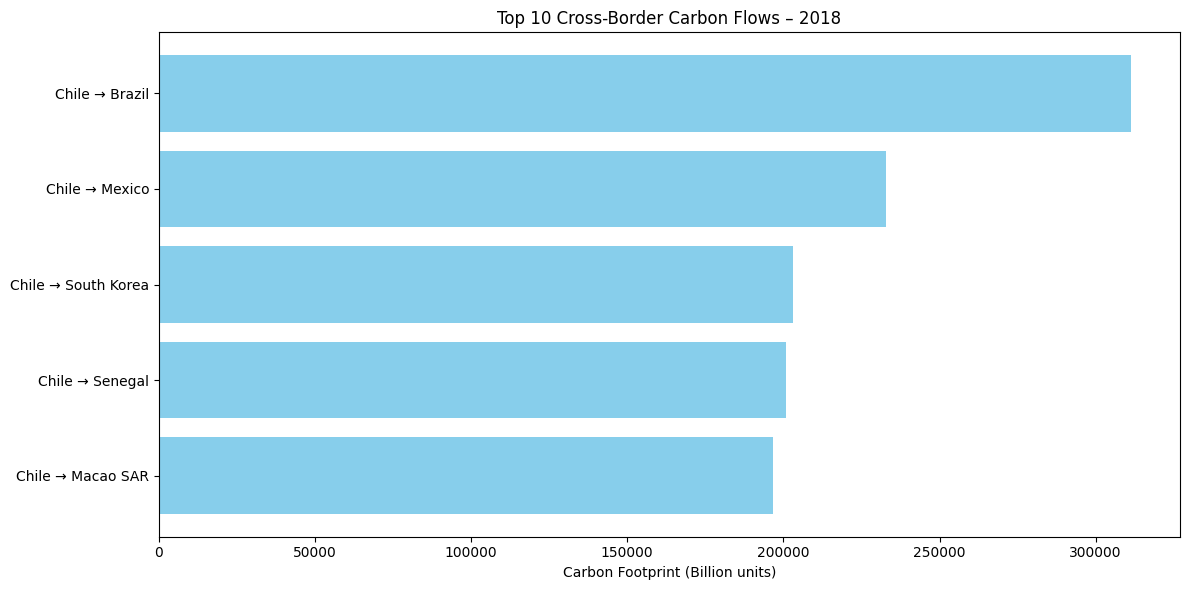


Processing year: 2019
Top 10 flows by value:
     source_country      source_sector target_country  \
3203           Fiji  {'Plastics, basic         Brazil   
3465           Fiji  {'Plastics, basic         Mexico   
3427           Fiji  {'Plastics, basic         Mexico   
3426           Fiji  {'Plastics, basic         Mexico   
3425           Fiji  {'Plastics, basic         Mexico   
3433           Fiji  {'Plastics, basic         Mexico   
3200           Fiji  {'Plastics, basic         Brazil   
3192           Fiji  {'Plastics, basic         Brazil   
5776           Fiji  {'Plastics, basic      Macao SAR   
3394           Fiji  {'Plastics, basic         Mexico   

                                          target_sector         value  
3203  {'Re-processing of secondary lead into new lea...  3.712428e+15  
3465  {'Production of electricity by solar photovoltaic  2.885912e+15  
3427                                  {'Plastics, basic  2.795054e+15  
3426                               {'P

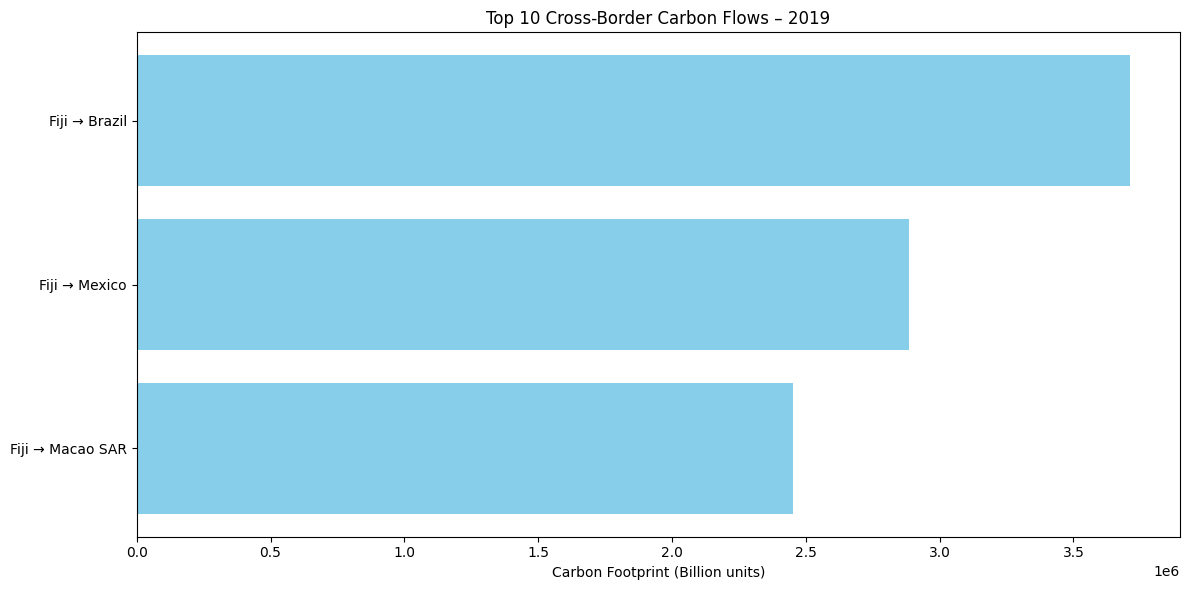


Processing year: 2020
Top 10 flows by value:
      source_country                  source_sector target_country  \
8819         Senegal  {'Hotels and restaurants (55)         Brazil   
9081         Senegal  {'Hotels and restaurants (55)         Mexico   
9043         Senegal  {'Hotels and restaurants (55)         Mexico   
9042         Senegal  {'Hotels and restaurants (55)         Mexico   
9041         Senegal  {'Hotels and restaurants (55)         Mexico   
9049         Senegal  {'Hotels and restaurants (55)         Mexico   
8816         Senegal  {'Hotels and restaurants (55)         Brazil   
11411        Senegal  {'Hotels and restaurants (55)      Macao SAR   
19721        Senegal  {'Hotels and restaurants (55)        Senegal   
8808         Senegal  {'Hotels and restaurants (55)         Brazil   

                                           target_sector         value  
8819   {'Re-processing of secondary lead into new lea...  4.566835e+13  
9081   {'Production of electricity by

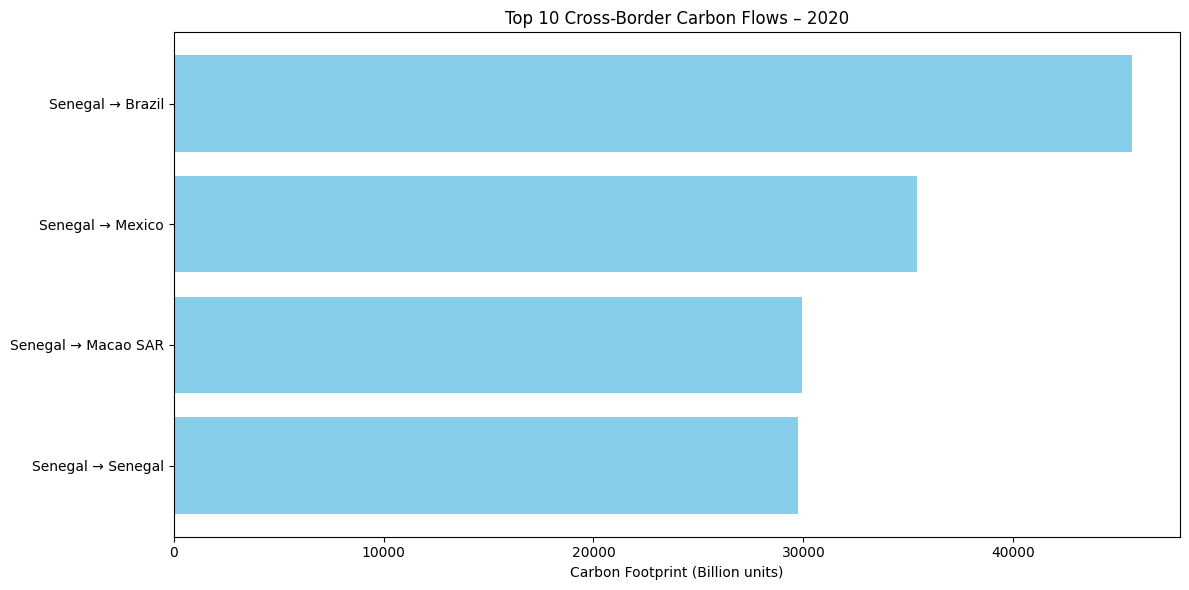


Processing year: 2021
Top 10 flows by value:
      source_country                                      source_sector  \
69364        Burundi                                            {'Paper   
12782    North Korea  {'Re-processing of secondary lead into new lea...   
69625        Burundi                                            {'Paper   
69587        Burundi                                            {'Paper   
69586        Burundi                                            {'Paper   
69585        Burundi                                            {'Paper   
69593        Burundi                                            {'Paper   
13042    North Korea  {'Re-processing of secondary lead into new lea...   
71956        Burundi                                            {'Paper   
77363        Burundi                                            {'Paper   

      target_country                                      target_sector  \
69364         Brazil  {'Re-processing of secondary le

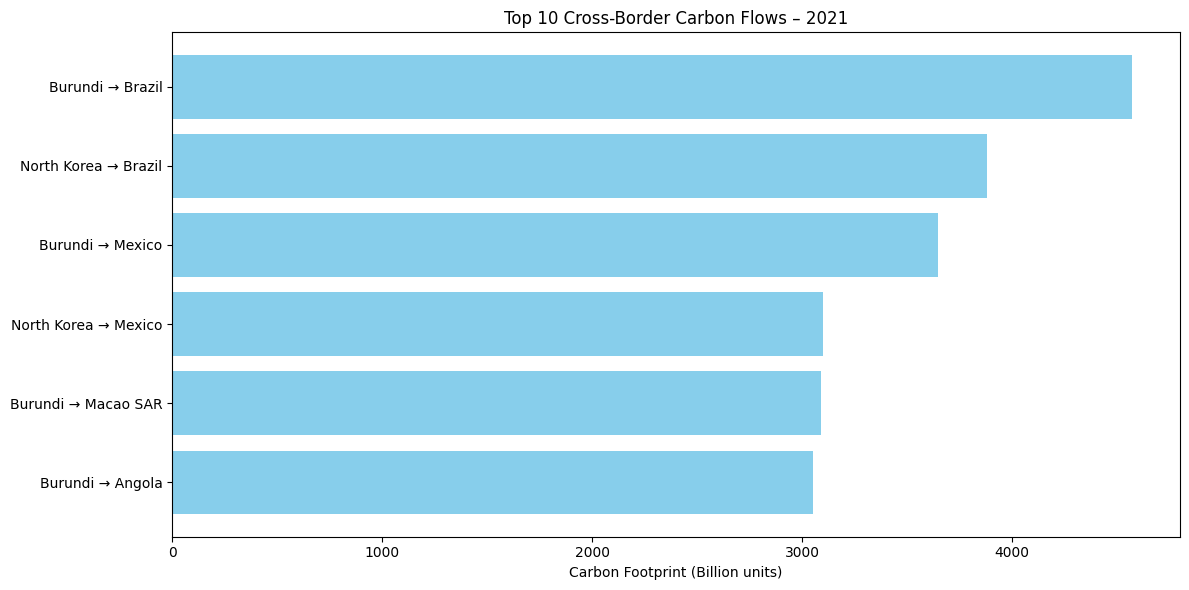


Processing year: 2022
Top 10 flows by value:
    source_country                                      source_sector  \
211        Burundi                                            {'Paper   
259        Burundi                                            {'Paper   
209        Burundi                                            {'Paper   
215        Burundi                                            {'Paper   
198        Burundi                                            {'Paper   
270        Burundi                                            {'Paper   
202        Burundi                                            {'Paper   
54          Turkey  {'"Retail trade, except of motor vehicles and ...   
274        Burundi                                            {'Paper   
273        Burundi                                            {'Paper   

    target_country                                      target_sector  \
211         Brazil  {'Re-processing of secondary lead into new lea...   
259 

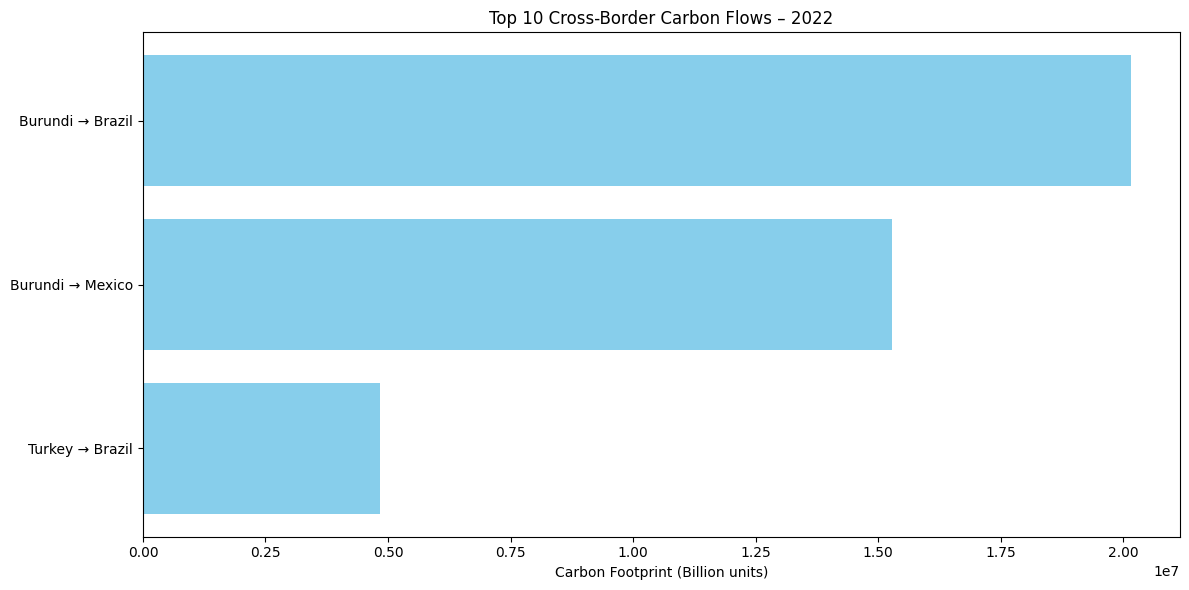

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Input directory
input_dir = "Sankey_Outputs"
years = [2018, 2019, 2020, 2021, 2022]

for year in years:
    print(f"\nProcessing year: {year}")
    csv_path = os.path.join(input_dir, f"sankey_readable_flows_{year}.csv")

    if not os.path.exists(csv_path):
        print(f"File not found: {csv_path}, skipping...")
        continue

    df = pd.read_csv(csv_path)

    # Clean and parse labels
    df['source_country'] = df['source_label'].apply(lambda x: x.split(" / ")[0].strip("{'\" "))
    df['source_sector'] = df['source_label'].apply(lambda x: x.split(" / ")[1].strip("}'\" "))
    df['target_country'] = df['target_label'].apply(lambda x: x.split(" / ")[0].strip("{'\" "))
    df['target_sector'] = df['target_label'].apply(lambda x: x.split(" / ")[1].strip("}'\" "))

    # Sort and trace highest impact flows
    df_sorted = df.sort_values(by="value", ascending=False).head(10)

    print("Top 10 flows by value:")
    print(df_sorted[["source_country", "source_sector", "target_country", "target_sector", "value"]])

    # Summarize by source country and sector
    by_source = df.groupby(["source_country", "source_sector"])["value"].sum().reset_index().sort_values("value", ascending=False).head(10)
    print("\nTop Source Country-Sectors:")
    print(by_source)

    # Summarize by target country and sector
    by_target = df.groupby(["target_country", "target_sector"])["value"].sum().reset_index().sort_values("value", ascending=False).head(10)
    print("\nTop Target Country-Sectors:")
    print(by_target)

    # Plot top 10 flows
    plt.figure(figsize=(12, 6))
    labels = [f"{r['source_country']} → {r['target_country']}" for _, r in df_sorted.iterrows()]
    plt.barh(labels, df_sorted["value"]/1e9, color='skyblue')
    plt.xlabel("Carbon Footprint (Billion units)")
    plt.title(f"Top 10 Cross-Border Carbon Flows – {year}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


In [4]:
import requests
import pandas as pd

def fetch_off_carbon_intensity(category, price_per_100g_eur):
    url = f"https://world.openfoodfacts.org/category/{category}.json"
    response = requests.get(url)
    data = response.json()

    products = data.get("products", [])
    values = []

    for p in products:
        val = p.get("carbon-footprint_100g")
        if val:
            try:
                # Convert g CO₂/100g to kg CO₂ / EUR
                g_co2 = float(val)
                kg_per_eur = g_co2 / 100 / price_per_100g_eur
                values.append(kg_per_eur)
            except:
                continue

    if not values:
        return None

    return sum(values) / len(values)  # average


In [ ]:
# Map OFF Category → MRIO Sector and Update F Matrix
off_to_mrio = {
    "meats": 10423,         # Example: index in MRIO for meat
    "cheeses": 9821,        # Example
    "vegetables": 7521,     # Example
}

# Assume `F` is your TensorFlow or NumPy matrix: (n_indicators, n_sectors)
# And `carbon_index` = 0 (index of CO2 in F)

for cat, idx in off_to_mrio.items():
    price_est = 1.5  # estimated EUR per 100g
    avg_intensity = fetch_off_carbon_intensity(cat, price_per_100g_eur=price_est)
    if avg_intensity:
        print(f"{cat}: ~{avg_intensity:.2f} kg CO₂ / EUR → updating F[{0},{idx}]")
        F[0, idx] = avg_intensity


In [1]:
!pip install openfoodfacts


In [1]:
pip install kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 9.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas plotly matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 7.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openai langchain streamlit fastapi uvicorn faiss-cpu


  Using cached openai-1.79.0-py3-none-any.whl.metadata (25 kB)
  Using cached langchain-0.3.25-py3-none-any.whl.metadata (7.8 kB)
  Using cached streamlit-1.45.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached uvicorn-0.34.2-py3-none-any.whl.metadata (6.5 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached r